<div class="alert alert-block alert-info">
<center>ESTATÍSTICA APLICADA</center>
<center>Projeto Guiado</center>
<center>ALUNO: Diego Cardoso dos Santos</center>
</div>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Questão 1

In [65]:
police = pd.read_csv("police.csv")
police

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [66]:
"""Letra A"""

print("O número de variáveis no FataFrame são: {}, e o número de registros catalogados foram: {}".format(len(police.columns), len(police)))

O número de variáveis no FataFrame são: 15, e o número de registros catalogados foram: 91741


In [67]:
"""Letra B"""

x = police.columns
dic = {}

for i in range(len(x)):
    dic[x[i]] = police[x[i]].isnull().sum()
    
pd.DataFrame(dic, index= ["Valores faltosos"])

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
Valores faltosos,0,0,0,91741,5205,5202,5202,5202,0,88434,5202,5202,5202,0,0


In [68]:
"""Letra C"""

police = police.drop(["county_name", "state"], axis=1)
police.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [69]:
"""Letra D"""

police.dropna(axis = 0, inplace = True, subset= ['driver_gender'])
len(police)

86536

In [70]:
"""Letra E"""

police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


In [71]:
"""Letra F"""

police['stop_datetime'] = police['stop_date'] + " " + police['stop_time']
police['stop_datetime'] = pd.to_datetime(police['stop_datetime'])

In [72]:
"""Letra G"""

police.set_index('stop_datetime', inplace = True)

## Questão 2

In [74]:
"""Letra A"""

df_violation = pd.DataFrame(police['violation'].value_counts())
#menos_comum = police['violation'].value_counts()[-1].index()
#mais_comum = police['violation'].value_counts()[0].index()
#print("A infração mais comum é: {} e a menos comum é: {}".format(mais_comum, menos_comum))
df_violation

,violation
Speeding,48423
Moving violation,16224
Equipment,10921
Other,4409
Registration/plates,3703
Seat belt,2856


In [75]:
"""Letra B"""

df_homem = police.loc[police['driver_gender'] == 'M']
df_mulher = police.loc[police['driver_gender'] == 'F']

fa_violation = pd.DataFrame({'Homem': df_homem['violation'].value_counts(),
                         'Mulher': df_mulher['violation'].value_counts()}).rename_axis('FA Violações')

fr_violation = pd.DataFrame({'Homem': np.around(df_homem['violation'].value_counts()/police['violation'].value_counts().sum()*100,decimals=2),
                         'Mulher': np.around(df_mulher['violation'].value_counts()/police['violation'].value_counts().sum()*100,decimals=2)}).rename_axis('FR Violações')

display(fa_violation)
display(fr_violation)

,Homem,Mulher
FA Violações,,
Equipment,8420,2501
Moving violation,12938,3286
Other,3702,707
Registration/plates,2647,1056
Seat belt,2278,578
Speeding,32777,15646


,Homem,Mulher
FR Violações,,
Equipment,9.73,2.89
Moving violation,14.95,3.80
Other,4.28,0.82
Registration/plates,3.06,1.22
Seat belt,2.63,0.67
Speeding,37.88,18.08


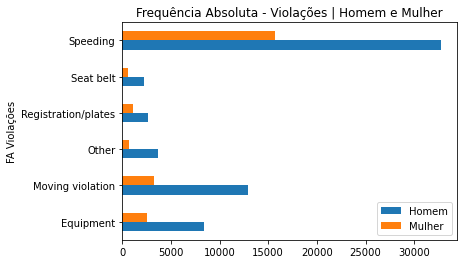

<AxesSubplot:title={'center':'Frequência Relativa - Violações | Homem e Mulher'}, ylabel='FR Violações'>

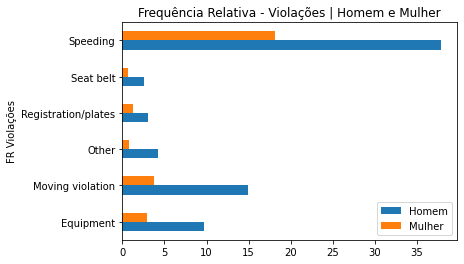

In [76]:
"""Letra C"""

%matplotlib inline
fa_violation.plot.barh(title='Frequência Absoluta - Violações | Homem e Mulher')
plt.show()
fr_violation.plot.barh(title='Frequência Relativa - Violações | Homem e Mulher')

In [77]:
"""Letra D"""

df_homem = police.loc[police['driver_gender'] == 'M']
df_mulher = police.loc[police['driver_gender'] == 'F']

fa_paradas = pd.DataFrame({'Homem': df_homem['stop_outcome'].value_counts(),
                         'Mulher': df_mulher['stop_outcome'].value_counts()}).rename_axis('FA Paradas')

fr_paradas = pd.DataFrame({'Homem': np.around(df_homem['stop_outcome'].value_counts()/police['stop_outcome'].value_counts().sum()*100,decimals=2),
                         'Mulher': np.around(df_mulher['stop_outcome'].value_counts()/police['stop_outcome'].value_counts().sum()*100,decimals=2)}).rename_axis('FR Paradas')


display(fa_paradas)
display(fr_paradas)

,Homem,Mulher
FA Paradas,,
Arrest Driver,2179,556
Arrest Passenger,230,113
Citation,55840,21251
N/D,439,168
No Action,423,201
Warning,3651,1485


,Homem,Mulher
FR Paradas,,
Arrest Driver,2.52,0.64
Arrest Passenger,0.27,0.13
Citation,64.53,24.56
N/D,0.51,0.19
No Action,0.49,0.23
Warning,4.22,1.72


In [78]:
"""Letra E"""

df_homem = police.loc[police['driver_gender'] == 'M']
df_mulher = police.loc[police['driver_gender'] == 'F']

fa_revistas = pd.DataFrame({'Homem': df_homem['search_conducted'].value_counts(),
                         'Mulher': df_mulher['search_conducted'].value_counts()}).rename_axis('FA Revistas')

fr_revistas = pd.DataFrame({'Homem': np.around(df_homem['search_conducted'].value_counts()/police['search_conducted'].value_counts().sum()*100,decimals=2),
                         'Mulher': np.around(df_mulher['search_conducted'].value_counts()/police['search_conducted'].value_counts().sum()*100,decimals=2)}).rename_axis('FR Revistas')


display(fa_revistas)
display(fr_revistas)


,Homem,Mulher
FA Revistas,,
False,59911,23318
True,2851,456


,Homem,Mulher
FR Revistas,,
False,69.23,26.95
True,3.29,0.53


In [79]:
"""LETRA F"""

df_homem = police.loc[police['driver_gender'] == 'M']
df_mulher = police.loc[police['driver_gender'] == 'F']

qtd_genero = pd.DataFrame({'Homem': len(df_homem),
                         'Mulher': len(df_mulher)}, index = ['Qtd']).rename_axis('Taxa Por Gênero')

qtd_genero

,Homem,Mulher
Taxa Por Gênero,,
Qtd,62762,23774


In [80]:
"""LETRA G"""

df_homem = police.loc[police['driver_gender'] == 'M']
df_mulher = police.loc[police['driver_gender'] == 'F']

homem_qtd_infra = pd.DataFrame({'Com revista': df_homem.loc[df_homem['search_conducted'] == True]['violation'].value_counts(),
                         'Sem Revista': df_homem.loc[df_homem['search_conducted'] == False]['violation'].value_counts()}).rename_axis('Revistas | Homem')

mulher_qtd_infra = pd.DataFrame({'Com revista': df_mulher.loc[df_mulher['search_conducted'] == True]['violation'].value_counts(),
                         'Sem Revista': df_mulher.loc[df_mulher['search_conducted'] == False]['violation'].value_counts()}).rename_axis('Revistas | Mulher')

display(homem_qtd_infra)
display(mulher_qtd_infra)

,Com revista,Sem Revista
Revistas | Homem,,
Equipment,602,7818
Moving violation,796,12142
Other,171,3531
Registration/plates,288,2359
Seat belt,80,2198
Speeding,914,31863


,Com revista,Sem Revista
Revistas | Mulher,,
Speeding,130,15516
Moving violation,129,3157
Equipment,100,2401
Registration/plates,58,998
Other,29,678
Seat belt,10,568


## Questão 3

In [81]:
"""Letra A"""

media_arrested = police['is_arrested'].mean()

In [91]:
"""Letra B"""

hourly_arrest_rate = police.groupby(by=lambda x: x.hour)['is_arrested']

hourly_arrest_rate = pd.DataFrame(hourly_arrest_rate)

hourly_arrest_rate.rename({"stop_datetime": "Horas"}, inplace = True)
hourly_arrest_rate.rename({"is_arrested": "Prisões"}, axis= 'columns', inplace = True)

hourly_arrest_rate

,0,1
0,0,stop_datetime 2005-07-19 00:30:00 False 200...
1,1,stop_datetime 2005-02-24 01:20:00 False 200...
2,2,stop_datetime 2005-10-02 02:10:00 False 200...
3,3,stop_datetime 2005-10-02 03:00:00 False 200...
4,4,stop_datetime 2005-02-17 04:15:00 False 200...
5,5,stop_datetime 2005-10-06 05:31:00 False 200...
6,6,stop_datetime 2005-10-01 06:15:00 False 200...
7,7,stop_datetime 2005-10-02 07:45:00 False 200...
8,8,stop_datetime 2005-10-01 08:30:00 False 200...
9,9,stop_datetime 2005-09-30 09:50:00 False 200...


<AxesSubplot:xlabel='Horas', ylabel=' Taxa de Prisões por Hora do Dia'>

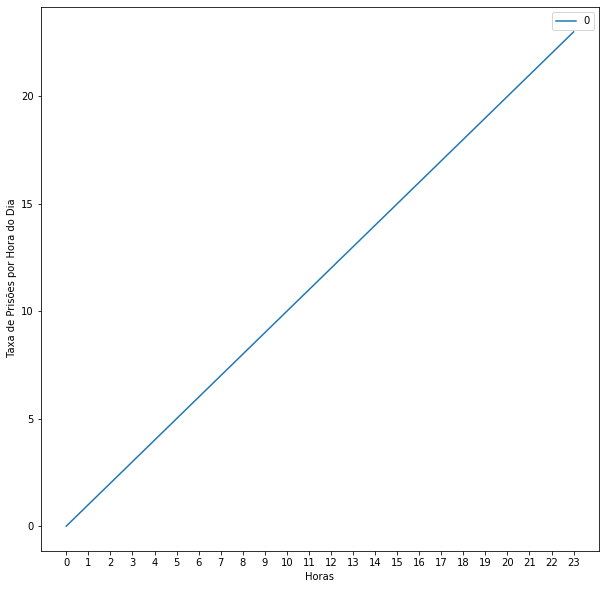

In [89]:
"""Letra C"""

hourly_arrest_rate.plot(xticks = range(0, 24), figsize = (10,10), xlabel = "Horas", ylabel = " Taxa de Prisões por Hora do Dia")

2005     16
2006     73
2007     72
2008     62
2009     71
2010     72
2011     75
2012    103
2013     99
2014    120
2015     99
Name: drugs_related_stop, dtype: int64

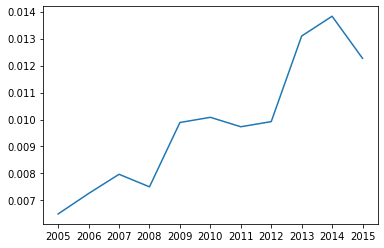

In [43]:
"""Letra D"""

drugStop = police.groupby(by=lambda x: x.year)['drugs_related_stop'].mean()

indx = list(drugStop.keys())
drugStop.plot(xticks = range(indx[0], indx[-1]+1))
display(police.groupby(by=lambda x: x.year)['drugs_related_stop'].sum())

Apesar das abordagens diminuirem as apreenssões de drogas aumentaram


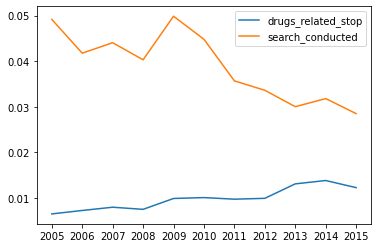

In [46]:
"""Letra E"""

Annual_search_rate = police[['drugs_related_stop', 'search_conducted']].groupby(by=lambda x: x.year).mean()


Annual_search_rate.plot(xticks = range(2005,2016))


print(\
    'Apesar das abordagens diminuirem as apreenssões de drogas aumentaram')

A zona K1 apresenta bem menos infrações do que a zona K2


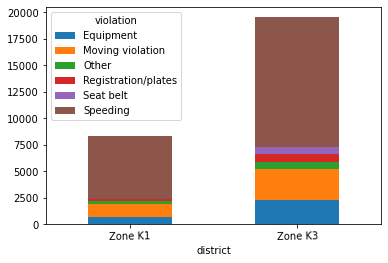

In [48]:
"""Letra F"""

districtViolation = pd.crosstab(police['district'],police['violation'])

districtViolation.loc[['Zone K1', 'Zone K3']].plot.bar(stacked = True, rot = True)

print(\
'A zona K1 apresenta bem menos infrações do que a zona K2'\
)

## Questão 4

In [51]:
weather = pd.read_csv("weather.csv")

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


,TMIN,TAVG,TMAX
0,35,44.0,53
1,28,36.0,44
2,44,49.0,53
3,39,42.0,45
4,28,36.0,43
...,...,...,...
4012,44,51.0,61
4013,30,40.0,44
4014,28,33.0,40
4015,27,30.0,35


Ao analisar a descrição, podemos ver que o local, cujo os dados foram coletados, é relativamente frio, pois sua temperatura média é de F° 52,49 (cerca de C° 11,38)


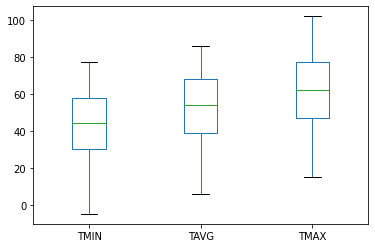

In [52]:
"""Letra A"""

useWeather = weather[['TMIN', 'TAVG', 'TMAX']]


display(useWeather.describe())
display(useWeather)

useWeather.plot.box()

print(\
'O local é frio, sua média é de 52F)

<AxesSubplot:>

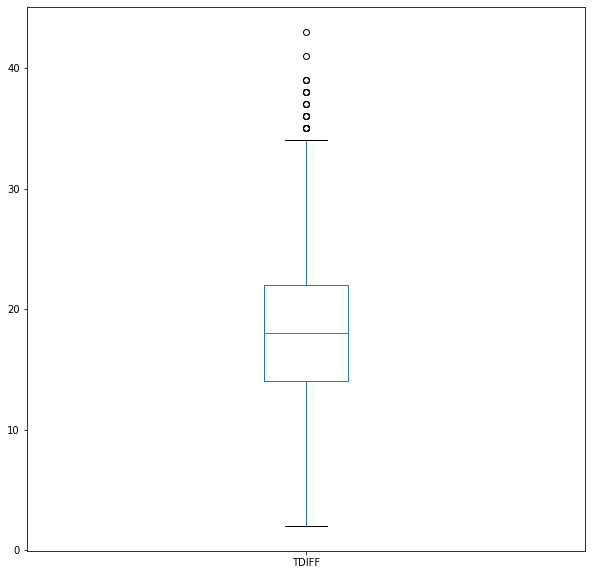

In [53]:
"""Letra B"""

weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

weather['TDIFF'].plot.box(figsize = (10,10))

In [54]:
"""Letra C"""

police.reset_index(inplace= True)

filterWeather = weather['DATE']

In [57]:
"""Letra D"""

mergePoliceWeather = pd.merge(police, weather, left_index=True, right_index=True).set_index('stop_datetime')
mergePoliceWeather

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-02-22 10:06:00,2006-02-22,10:06,F,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2006-02-22 10:10:00,2006-02-22,10:10,F,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
2006-02-22 10:10:00,2006-02-22,10:10,M,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [63]:
"""Letra E"""

"""Quais são os tipos encontrados na coluna drive_race"""
tipos_driver = pd.DataFrame(mergePoliceWeather['driver_race'].value_counts())

print("Primeira questão")
display(tipos_driver)

"""Quais são os tipos encontrados na coluna violation_raw"""

tipos_raw = pd.DataFrame(mergePoliceWeather['violation_raw'].value_counts())

print("\nSegunda questão")
display(tipos_raw)

Primeira questão


,driver_race
White,3357
Black,439
Asian,126
Hispanic,77
Other,18



Segunda questão


,violation_raw
Speeding,3018
Other Traffic Violation,520
Equipment/Inspection Violation,244
Registration Violation,144
Call for Service,48
Motorist Assist/Courtesy,22
APB,10
Special Detail/Directed Patrol,7
Violation of City/Town Ordinance,3
Suspicious Person,1
